In [148]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns

from scipy.stats import t, f, ttest_ind
from statsmodels.formula.api import ols

In [149]:
# Importing iris dataset as a Pandas dataframe
df = pd.read_csv('../Dataset/iris.csv')

In [150]:
# Initial visualizatin of the dataframe
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [151]:
# renaming colmns to remove space in he beginning of series name
df=df.rename(columns={' sepal_width':'sepal_width', ' petal_length':'petal_length', ' petal_width':'petal_width', ' class':'class'})

In [152]:
# Initial check of data shows that there are 5 series, 150 entries, no NaN values.
# Series expected to contain measurements are of type float
# Series expected to contain text is of type object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [153]:
# There are 3 species of iris in series 'class' with 50 entries each.
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [154]:
# Descriptive analysis of the dataframe shows for mean, standard deviation (std) and median (50%) for each data series.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [155]:
# Descriptive analysis of each species separately shows mean, standard deviation (std) and median (50%) for each data series.

species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # list of species in dataframe

for species in species_list:
    print(f'Descriptive analysis for {species}:') # print a heading line
    print(f"{df[df['class'] == species].describe()}\n") # print result from describe() funktion on dataframe filtered for each species


Descriptive analysis for Iris-setosa:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Descriptive analysis for Iris-versicolor:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000

In [157]:
# Q1. Construct a 95% confidence interval for means for sepal width for each species
# filtering used in the for loop for example for setosa: setosa = df[df['class'] == 'Iris-setosa']

species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # list of species in dataframe
alpha = 0.05  # confidence interval
n= 50 # number of samples for each species

for species in species_list:                                    # calculations for each species in the list
    sem = scs.sem(df[df['class'] == species]['sepal_width'])    # Standard error for the specific species
    mean = df[df['class'] == species]['sepal_width'].mean()     # Average for the specific species
    lower, upper = t.interval(confidence=1-alpha, df=n-1, loc=mean, scale=sem) # Calculating lower and higher limits of the confidence interval
    print(f'Confidence interval for {species} is : {lower:.2f}-{upper:.2f}') # Printing confidence intervall

Confidence interval for Iris-setosa is : 3.31-3.53
Confidence interval for Iris-versicolor is : 2.68-2.86
Confidence interval for Iris-virginica is : 2.88-3.07


In [165]:
# Q2. Is sepal length for Iris-virginica different from sepal length for Iris-versicolor?

# Test is done in 2 steps:
# 1. test if variances for the two populations are equal
        # H_a: sigma_virginica != sigma_versicolor
        # H_0: sigma_virginica = sigma_versicolor
# 2. Hypothesis testing where:
        # H_a: µ_virginica != µ_versicolor
        # H_0: µ_virginica = µ_versicolor


filt_virginica = (df['class'] == 'Iris-virginica')      # Filter to filter out Iris-virginica from full dataframe df
filt_versicolor = (df['class'] == 'Iris-versicolor')    # Filter to filter out Iris-versicolor from full dataframe df
n = 50                                                  # Both series contain 50 samples
alpha = 0.05

# Test of variances:
f_statistic = df[filt_virginica]["sepal_length"].var()/df[filt_versicolor]["sepal_length"].var() # Statistica for samples: var_virginica/var_versicolor
f_crit_49_49 = f.ppf(q=0.05, dfn=n-1, dfd=n-1) # Critical F value for 49,49 degrees of freedom
print(f'Test of variances:\n{f_statistic = :.3f}, {f_crit_49_49 = :.3f}') # printing results with 3 decimals
print(f'H0 can be discarded since f_statistica is larger than f_crit')
print(f'Conclusion: Variances for the two populations can not be assumed equal.\n')

# Test of means:
# a and b are series sepal_lengt filtered out for each class of iris; False based on test of variances above; two-sided since question was if non-equal
ttest_means = ttest_ind(a=df[filt_virginica]["sepal_length"], b=df[filt_versicolor]["sepal_length"], equal_var=False, alternative="two-sided")
print(f'Test of means:\n{ttest_means = }')
print(f'H0 hypothsis can be discarded, since the p-value from t-test (1.87e-07) is smaller than alpha (0.05)')
print(f'Conclusion: The sepial lengths for virginica and versicolor are different.')

Test of variances:
f_statistic = 1.518, f_crit_49_49 = 0.622
H0 can be discarded since f_statistica is larger than f_crit
Conclusion: Variances for the two populations can not be assumed equal.

Test of means:
ttest_means = Ttest_indResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07)
H0 hypothsis can be discarded, since the p-value from t-test (1.87e-07) is smaller than alpha (0.05)
Conclusion: The sepial lengths for virginica and versicolor are different.


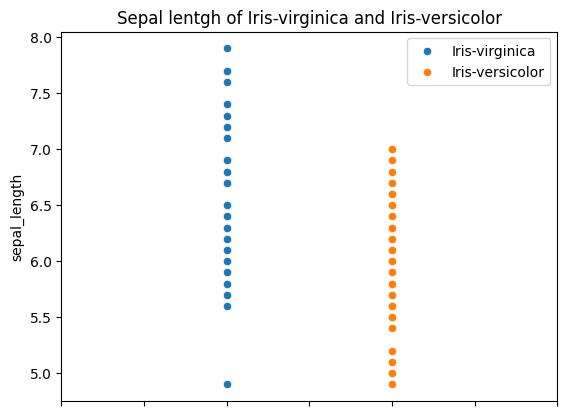

In [159]:
# Q2 Plot of sepal length for Iris-virginica and Iris-versicolor

# Arrays of ones and twos to be used as x values so sepal length is not plotted as function of index
x_1 = np.ones(50, dtype = int)
x_2 = 2 * x_1

sns.scatterplot(x=x_1, y=df[filt_virginica]["sepal_length"]).set(xticklabels=[]) # Sepal length for virginica plotted with x = 1, x-labels removed
sns.scatterplot(x=x_2, y=df[filt_versicolor]["sepal_length"]).set(xticklabels=[]) # # Sepal length for versicolor plotted with x = 2, x-labesl removed
plt.title("Sepal lentgh of Iris-virginica and Iris-versicolor") # Plot title
plt.xlim(0, 3) # x-values are 0 to 3 so x_1 and x_2 are centered in figure
plt.legend(labels=['Iris-virginica', 'Iris-versicolor']) # legend is added

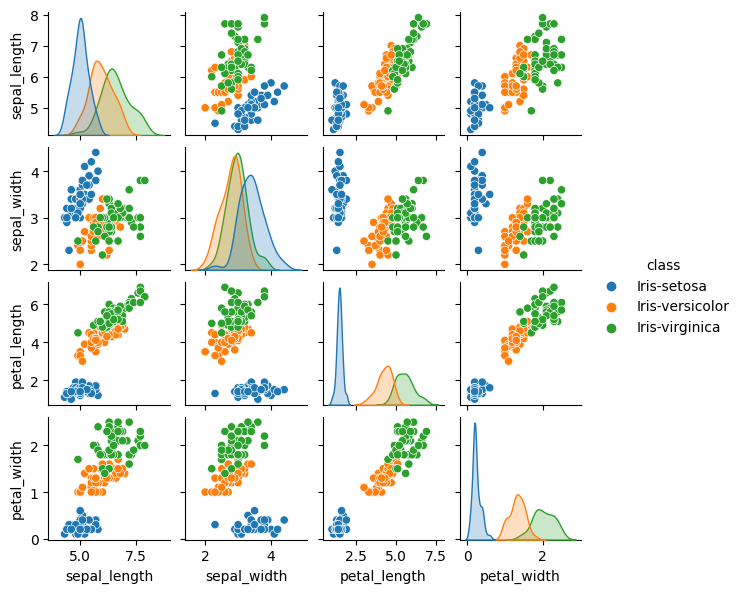

In [160]:
# Q3. Visulazation of all series relationships with class as hue
# ref: https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
sns.pairplot(data=df, hue='class', height=1.5)

In [161]:
# Q4. Describe dependency between petal lenght and petal width for Iris-setosa and compare with Iris-versicolor

# Regression with ordinary least squares
filt_setosa = (df['class'] == 'Iris-setosa')      # Filter to filter out Iris-setosa from full dataframe df
model = ols('petal_length ~ petal_width', data=df[filt_setosa]).fit()
print(model.summary())
print('Ordinary least squares shows poor dependency with R-squared 0.094')

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.970
Date:                Sun, 05 Feb 2023   Prob (F-statistic):             0.0305
Time:                        01:34:15   Log-Likelihood:                 19.597
No. Observations:                  50   AIC:                            -35.19
Df Residuals:                      48   BIC:                            -31.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3430      0.059     22.698      

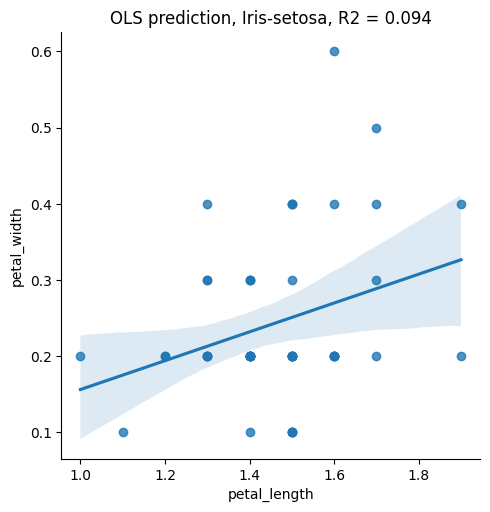

In [162]:
# Q4: In sample prediction for Isis-setosa
sns.lmplot(data=df[filt_setosa], x='petal_length', y='petal_width').set(title = "OLS prediction, Iris-setosa, R2 = 0.094")

In [163]:
# Q4. Describe dependency between petal lenght and petal width for Iris-versicolor

# Regression with ordinary least squares
filt_versicolor = (df['class'] == 'Iris-versicolor')      # Filter to filter out Iris-versicolor from full dataframe df
model = ols('petal_length ~ petal_width', data=df[filt_versicolor]).fit()
print(model.summary())
print('Ordinary least squares shows better dependency with R-squared 0.619')

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     77.93
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.27e-11
Time:                        01:34:16   Log-Likelihood:                -8.5674
No. Observations:                  50   AIC:                             21.13
Df Residuals:                      48   BIC:                             24.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7813      0.284      6.276      

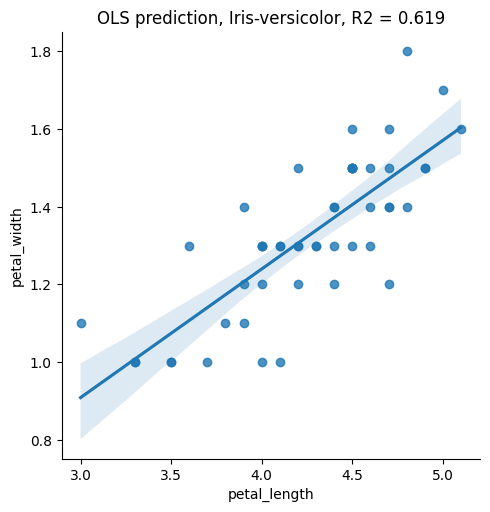

In [164]:
# Q4: In sample prediction for Iris-versicolor
sns.lmplot(data=df[filt_versicolor], x='petal_length', y='petal_width').set(title = "OLS prediction, Iris-versicolor, R2 = 0.619")